# Preliminary Modeling

Point person: Pranav

## Load libaries and data

In [1]:
# See binary_classification.py
from binary_classification import *

In [2]:
# Import libraries
import numpy as np
import pandas as pd

In [3]:
# Load pickled data
train_df = pd.read_pickle("data/train.pkl")
valid_df = pd.read_pickle("data/val.pkl")
test_df = pd.read_pickle("data/test.pkl")

## Examine columns

In [4]:
# Examine columns
columns = list(train_df.columns)
for col in columns:
    print("{}, {}".format(col, type(train_df[col][0])))

business_id, <class 'str'>
cool_r, <class 'numpy.int64'>
date_r, <class 'str'>
funny_r, <class 'numpy.int64'>
review_id_r, <class 'str'>
stars_r, <class 'numpy.int64'>
useful_r, <class 'numpy.int64'>
user_id, <class 'str'>
address_b, <class 'str'>
attributes_b, <class 'dict'>
categories_b, <class 'str'>
city_b, <class 'str'>
hours_b, <class 'dict'>
is_open_b, <class 'numpy.int64'>
latitude_b, <class 'numpy.float64'>
longitude_b, <class 'numpy.float64'>
name_b, <class 'str'>
postal_code_b, <class 'str'>
review_count_b, <class 'numpy.int64'>
stars_b, <class 'numpy.float64'>
state_b, <class 'str'>
average_stars_u, <class 'numpy.float64'>
compliment_cool_u, <class 'numpy.int64'>
compliment_cute_u, <class 'numpy.int64'>
compliment_funny_u, <class 'numpy.int64'>
compliment_hot_u, <class 'numpy.int64'>
compliment_list_u, <class 'numpy.int64'>
compliment_more_u, <class 'numpy.int64'>
compliment_note_u, <class 'numpy.int64'>
compliment_photos_u, <class 'numpy.int64'>
compliment_plain_u, <class 

## Notes on columns
All examples from train_df.iloc[0] first row of training data


### Exclude for now due to lack of preprocessing:

attributes_b: This is a dictionary containing attributes of a business. 
              Ex: {'ByAppointmentOnly': 'False',
                 'GoodForKids': 'False',
                 'BusinessAcceptsCreditCards': 'True',
                 'AcceptsInsurance': 'True'}

categories_b: This is a string containing comma separated categories that
              business falls in. 
              Ex: 'Fitness & Instruction, Doctors, Health & Medical, 
                   Active Life, Gyms, Emergency Rooms, Medical Centers, 
                   Hospitals'
                   
hours_b: This is a dictionary containing hours of operation of a business. May not be interesting anyway. 
       Ex: {'Monday': '0:0-0:0',
         'Tuesday': '0:0-0:0',
         'Wednesday': '0:0-0:0',
         'Thursday': '0:0-0:0',
         'Friday': '0:0-0:0',
         'Saturday': '0:0-0:0',
         'Sunday': '0:0-0:0'}
         
yelping_since_u: This is the date they began yelping. Currently a string - should be a timeseries type. 
                 Ex: '2008-07-10 17:24:47'
                 
friends_u: Comma separated string of friend user id's
         
         
### Weird parameters
                   
is_open_b: Seems to be a boolean on if the business is currently in operation


### Exclude because of statistical concerns

cool_r, date_r, funny_r, review_id_r, stars_r, useful_r: No review information should be used to predict the review's star rating


business_id, name_b, name_u, user_id: Names should be disregarded

### Exclude because they are strings
sklearn will want one-hot encoded columns for categorical variables

city_b, postal_code_b, state_b, elite_u

In [5]:
predictors = ['latitude_b', 'longitude_b', 'review_count_b', 
             'stars_b', 'average_stars_u',
             'compliment_cool_u', 'compliment_cute_u',
             'compliment_funny_u', 'compliment_hot_u',
             'compliment_list_u', 'compliment_more_u',
             'compliment_note_u', 'compliment_photos_u',
             'compliment_plain_u', 'compliment_profile_u',
             'compliment_writer_u', 'cool_u',
             'fans_u', 'funny_u', 'review_count_u',
              'useful_u']

## Binarize outcome

In [6]:
# 1 if 5 star rating, 0 else
train_df['outcome'] = np.where(train_df['stars_r']==5, 1, 0)
valid_df['outcome'] = np.where(valid_df['stars_r']==5, 1, 0)
test_df['outcome'] = np.where(test_df['stars_r']==5, 1, 0)

In [7]:
outcome = 'outcome'

# Logistic Regression

In [8]:
logistic_regression = logreg(train_data = train_df,
                       valid_data = valid_df,
                       test_data = test_df,
                       predictors = predictors,
                       outcome = outcome)

In [9]:
logistic_regression.train()

Time to train: 112.11


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy:             49.89%
F1:                   0.01%
Precision (PPV):      46.67%
Recall (Sensitivity): 0.00%




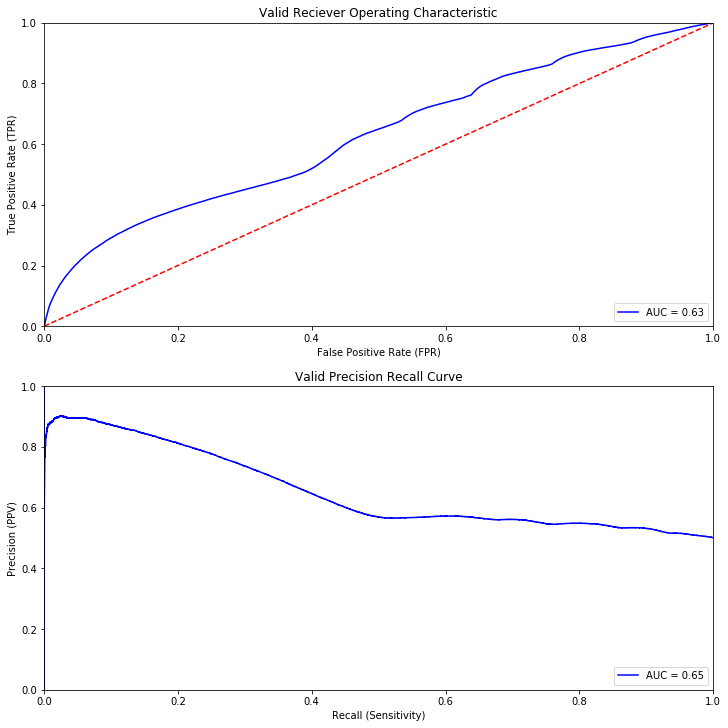

In [10]:
logistic_regression.test(prob_set = "Valid")

# Decision Tree

In [11]:
decision_tree = DecisionTree(train_data = train_df,
                       valid_data = valid_df,
                       test_data = test_df,
                       predictors = predictors,
                       outcome = outcome)

In [12]:
decision_tree.train()

Time to train: 8.44


Accuracy:             75.61%
F1:                   73.37%
Precision (PPV):      81.00%
Recall (Sensitivity): 67.05%




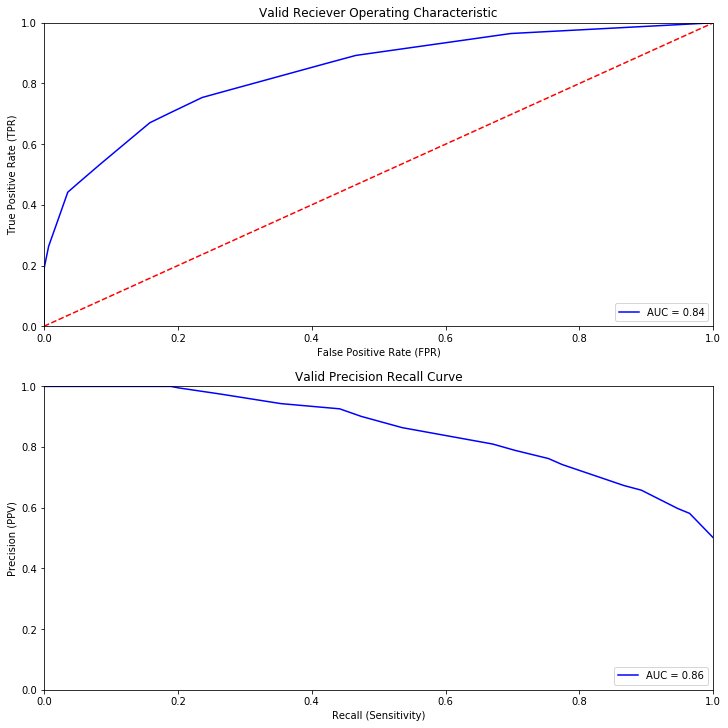

In [13]:
decision_tree.test(prob_set = "Valid")

# Random Forest

In [14]:
random_forest = RandomForest(train_data = train_df,
                       valid_data = valid_df,
                       test_data = test_df,
                       predictors = predictors,
                       outcome = outcome)

In [15]:
random_forest.train()

Time to train: 16.99


Accuracy:             74.46%
F1:                   71.08%
Precision (PPV):      82.17%
Recall (Sensitivity): 62.63%




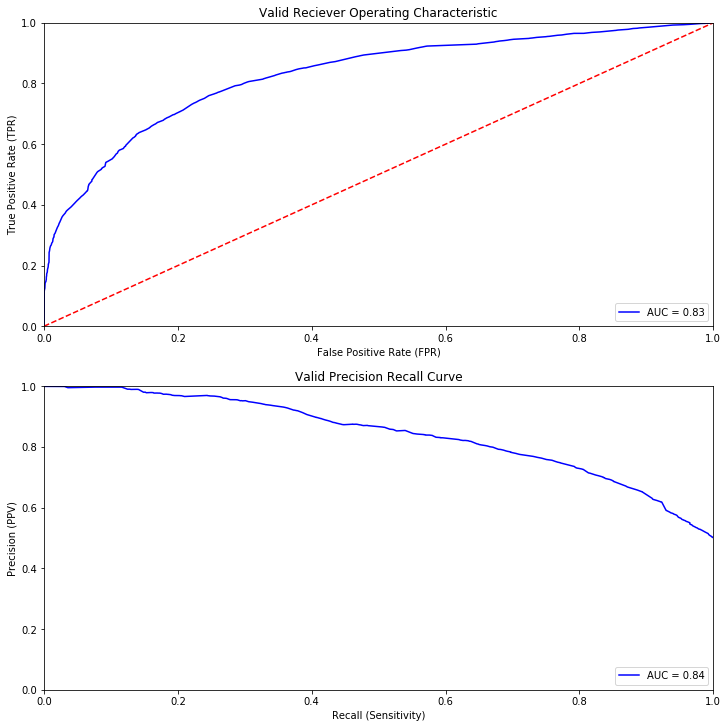

In [16]:
random_forest.test(prob_set = "Valid")

# Adaboost

In [17]:
adaboost = AdaBoost(train_data = train_df,
                   valid_data = valid_df,
                   test_data = test_df,
                   predictors = predictors,
                   outcome = outcome)

In [18]:
adaboost.train()

Time to train: 148.17


Accuracy:             76.62%
F1:                   75.03%
Precision (PPV):      80.73%
Recall (Sensitivity): 70.08%




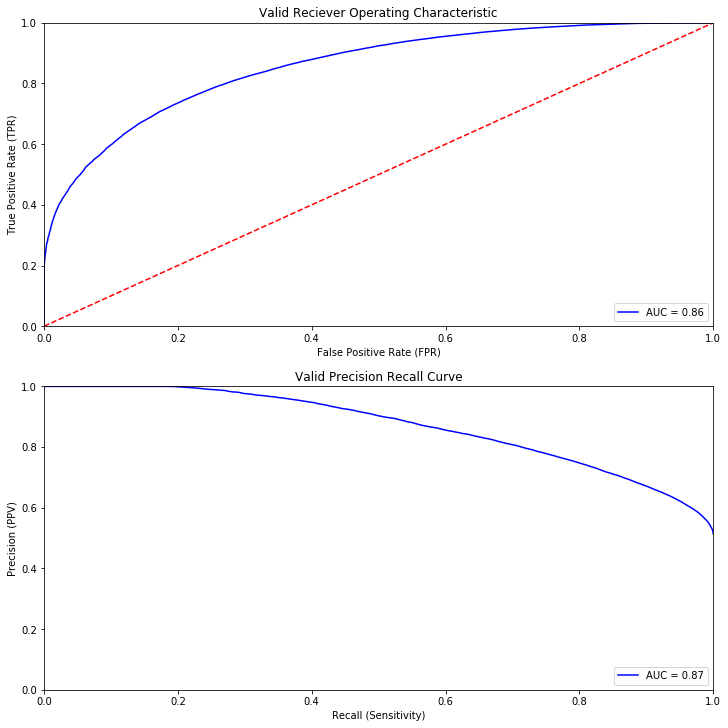

In [19]:
adaboost.test(prob_set = "Valid")